## CASE STUDY : Bellabeat
#### 17th August 2023
### About
#### Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company
1. #### Include ideas for users in-app to get more active minutes in during the work-week, such as workouts that are able to be completed in office on breaks. Also including push notifications to remind users of their daily goals could be helpful.
2. #### On weekends, allow users to choose their goals. They could set a rest goal or a workout goal or a combination of the two. If rest was chosen, there could be a journaling or mindfulness prompt. Otherwise “weekend warrior” workouts could be suggested. Push notifications and alerts could keep the user on track and celebrate them when completed.
3. #### Celebrate those that are working out after work, but also give options for workouts/activity that could be done on breaks at work, or in the morning before work to set up for the day. Allow goals to be set in the app and have push notifications to remind users of their preferences. For example, if a users preference was to work out in the morning, allow them to set an alarm in the app.

### Data Stored
#### It was stored on Kaggle Website
### Data Organization
* #### The data files are in long format. There are some duplicate files in both wide and narrow format as well
* #### The data does ROCCC as a practice data set. It also has some limitations and potentially some bias. I will go over each part of ROCCC below, but as a quick summary this data set is wonderful for practice and this case study, but in a professional setting it would not be comprehensive or current enough to be used on its own. Let’s dive into the details!
* #### Reliable: Yes. This data set is very popular for beginners, having been downloaded over 54,000 times. It also has a usability score of 10.0 on Kaggle and has the endorsement of Google, being featured as one of two options for a capstone project in Course 8 of the Google Data Analytics Certification program.
* #### Original: Yes “This dataset, generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.” quoted
* #### Comprehensive: No As a practice data set there are plenty of insights to be gleaned, but in a professional setting, it would need to be paired with another data set. For one thing, 30 respondents is a very small percentage of the total number of Fitbit users, not to mention the total number of fitness tracker users. Second, it is unknown what number of the 30 respondents were men, women, or gender neutral. This is especially concerning for the project at hand which is for Bellabeat, a fitness tracker company geared towards women.
* #### Current: No While 2016 might not feel like long ago, with the 2020 COVID-19 pandemic much more recent, this data is almost irrelevant besides as a practice data set. The pandemic completely changed how we look at fitness and the tools we use.
* #### Cited: Yes I included a quote under the “original” section and a link to the page.
## Data Integrity Verification
* #### I read through the metadata and looked through the data sets themselves. In addition, there is a more comprehensive document that goes over the metadata in more detail. While there is cleaning and additional verification to be done, the data has a very high score among Kaggle users and has been frequently spoken highly of throughout this course.
## Key tasks
* #### Download data and store it appropriately
    #### I downloaded the data to R and labeled it appropriately.
* #### Identify how it’s organized
    #### The data is primarily organized as long data though there are versions of the data that are wide. The data I will be working with is in the long format.
* #### Sort and filter the data
    #### I sorted and filtered the data of several of the data sets in Sheets to confirm there were no null values. I also ran some functions to confirm the reliability of the conversion from kilograms to pounds. Once the data sets were downloaded into R, I sorted and filtered them there as well. I confirmed things like column names and number of participants. My steps are detailed in the Process portion of this document.
* #### Determine the credibility of the data
    #### The data has a usability score of 10.0 after having been downloaded over 54,000 times. It is also endorsed by the instructors of the Google Data Analytics Certification. For this situation it is credible. Professionally I would only use it as a companion data set with the approval of my project manager.
* #### What tools I am using ?
    #### I am choosing to use R as my tool. The primary reason I am using R as my tool is because I can use it for the entirety of my project which is efficient. Also, R Markdown makes reporting seamless and I can even visualize my findings using ggplot2. I considered using SQL, but as the data set wasn’t part of the open data source, and I was having trouble loading it in, I decided against it.
* #### 

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Importing Datasets

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### I already checked the data in excel. I just need to make sure everything was imported correctly using head() function.

In [3]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(calories)

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


In [5]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [6]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [7]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### I spotted some problems with the timestamp data. So before analysis, I need to convert it to date time format and split to date and time

In [8]:
# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

## Exploring and Summarizing data

In [9]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

#### This information tells us about the number of participants in each data sets.
#### There is 33 participants in the activity, calories and intensities data sets, 24 in the sleep and only 8 in the weight data set. 8 participants is not signaficant to make any recomendations and conclusions based on the data.
#### Let's have a look at summary statistics of the data sets.

In [10]:
#activity
activity %>%
 select(TotalSteps,
       TotalDistance,
       SedentaryMinutes, Calories) %>%
summary()

activity %>%
 select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
summary()

#calories
calories %>%
 select(Calories) %>%
summary

#sleep
sleep %>%
 select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
summary()

#weight
weight %>%
 select(WeightKg, BMI) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

## Some interesting discoveries from this summary
* #### Average sedentary time is 991.2 minutes or 16 hours. It definately needs to be reduced
* #### The majority of the participants are lightly active
* #### On the average participants sleep for 7 hours
* #### Average total steps per day is 7638 which is little bit less than recommended 10000 steps per day

## Merging Data
#### Before begining to visualize the data, I need to merge two data sets.

In [11]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


## Visualization

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


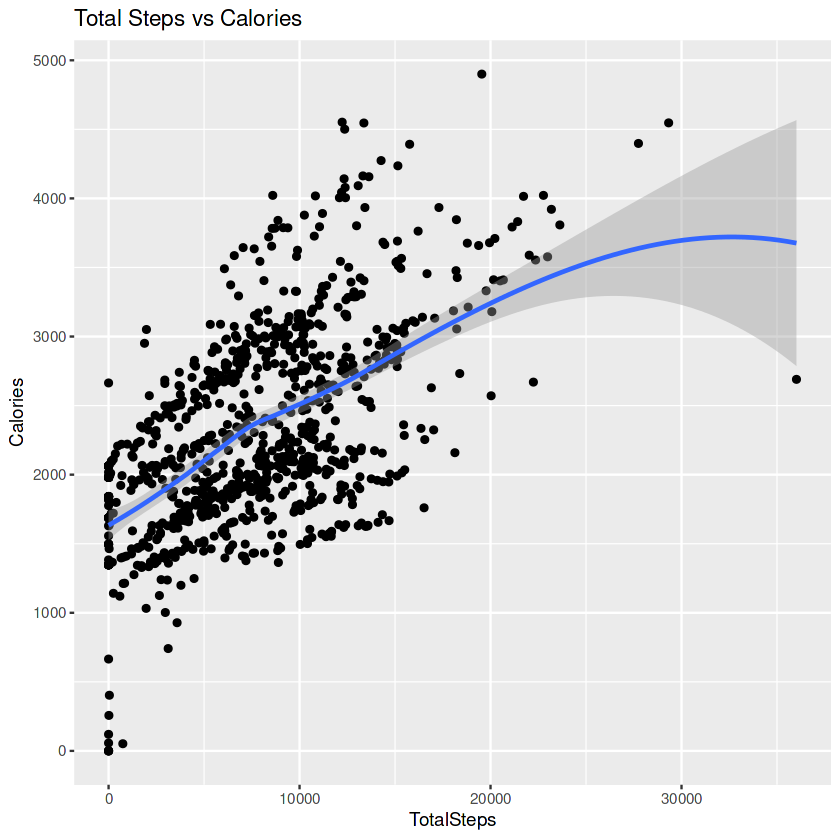

In [12]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
 geom_point() + geom_smooth() + labs(title="Total Steps vs Calories") 

### I see positive correlation here between Total Steps and Calories, whuch is a good thing.

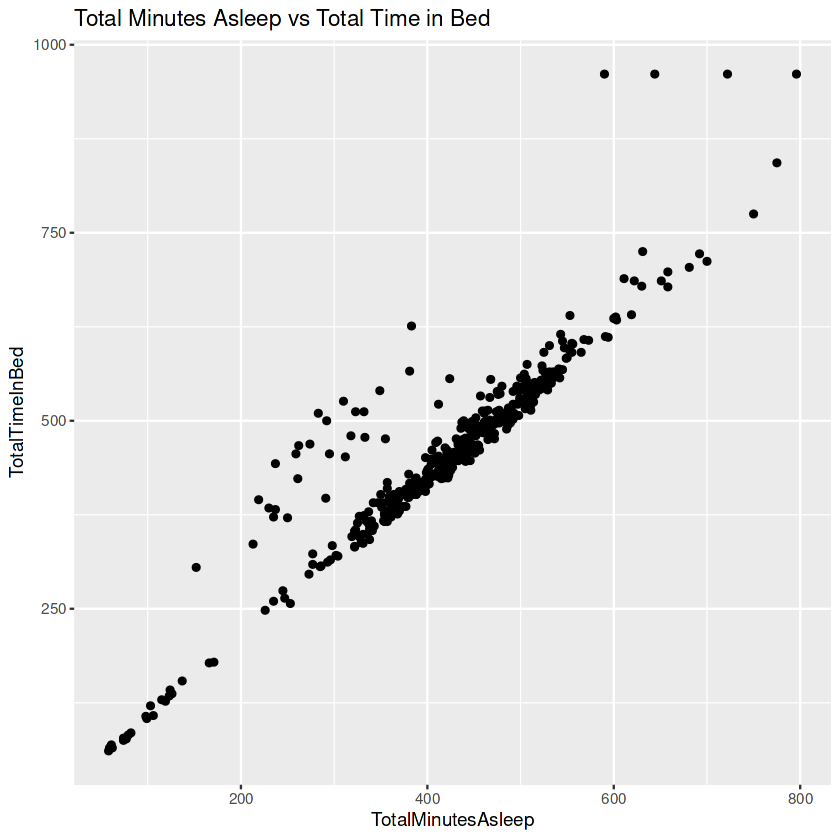

In [13]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
 geom_point() + labs(title="Total Minutes Asleep vs Total Time in Bed")

### The relationship between Total Minutes Asleep and Total Time in Bed looks linear. So no negative conclusions here. 

Warning message in geom_histogram(stat = "identity", fill = "darkblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


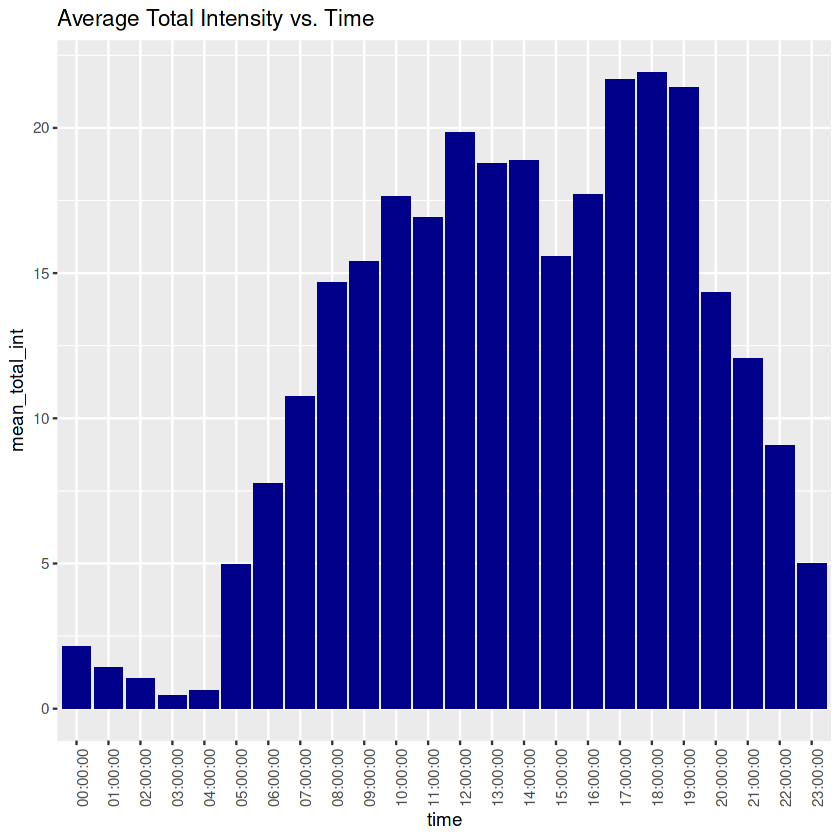

In [14]:
int_new <- intensities %>%
 group_by(time) %>%
 drop_na() %>%
 summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill="darkblue")+
 theme(axis.text.x = element_text(angle = 90)) +
 labs(title="Average Total Intensity vs. Time")

* ### This visualization tells that people are more active between 9am to 9pm
* ### Most activity happens in the afternoon and evening
* ### People are not active in the morning which should be a concern

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


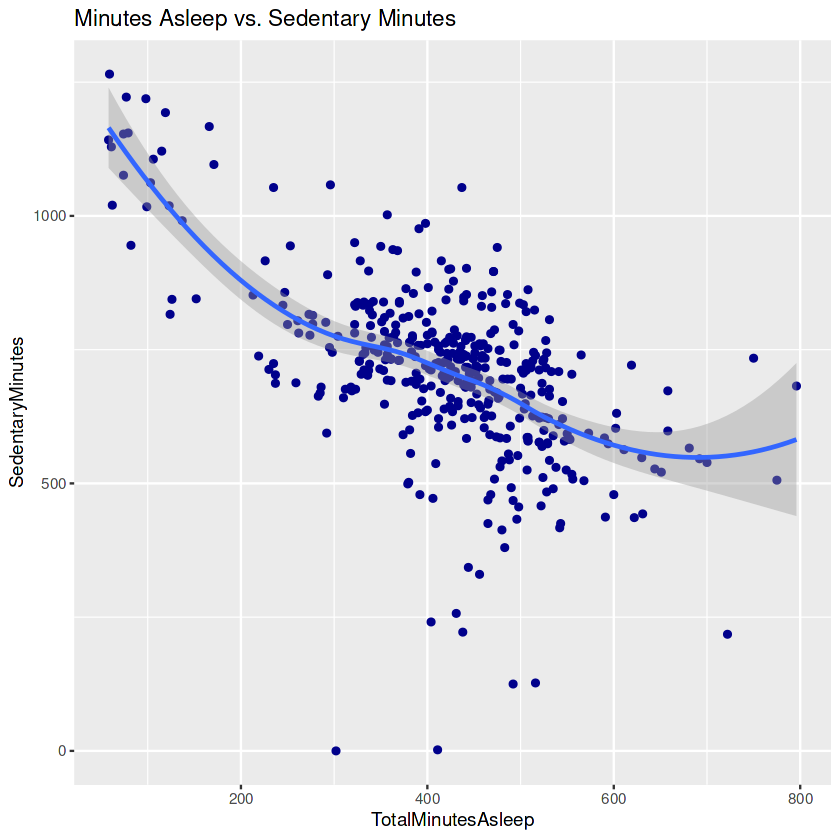

In [15]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
geom_point(color='darkblue') + geom_smooth() +
 labs(title="Minutes Asleep vs. Sedentary Minutes")

* ### Here is a negative relation between sedentary minutes and sleep time
* ### The app should push notification to people who are more sedantary to become more active

## Summary
#### We have collected ativity, sleep, weight and various data from different women and analyzed it.
* #### We found that working women are active during daylight time. 
* #### Not too many women are active during morning hours. That is a negative thing. The app should give information to particular users to be more active during day time
* #### The participating women are lightly active. That is both good and bad. The users shoud atleast be moderatly active during daytime
* #### Average total steps are lower than recomended according to research. 
* #### Bellabeat app shoud inform users to walk during daytime to reduse the sedantary time which is bad for health.
* #### The app also shoud notify users to sleep accordingly. A daily routine is always healthy.